In [5]:
pip install eleanor

In [6]:
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

In [7]:
import eleanor
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

In [8]:
star = eleanor.Source(tic=38846515, sector=1)

print('Found TIC {0} (Gaia {1}), with TESS magnitude {2}, RA {3}, and Dec {4}'
     .format(star.tic, star.gaia, star.tess_mag, star.coords[0], star.coords[1]))

Most recent sector available =  39
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector  1...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector  1 now available.
Found TIC 38846515 (Gaia 4675352109658261376), with TESS magnitude 10.3157, RA 68.9597092399964, and Dec -64.0270368810381


In [9]:
star = eleanor.Source(name='WASP-18 b', sector=2)

print('Found TIC {0} (Gaia {1}), with TESS magnitude {2}, RA {3}, and Dec {4}'
     .format(star.tic, star.gaia, star.tess_mag, star.coords[0], star.coords[1]))

coords = (68.959732, -64.02704)
# or
coords = SkyCoord(ra=68.959732, dec=-64.02704, unit=(u.deg, u.deg))

star = eleanor.Source(coords=coords, sector=1)

print('Found TIC {0} (Gaia {1}), with TESS magnitude {2}, RA {3}, and Dec {4}'
     .format(star.tic, star.gaia, star.tess_mag, star.coords[0], star.coords[1]))

star = eleanor.Source(gaia=4675352109658261376, sector=1)

print('Found TIC {0} (Gaia {1}), with TESS magnitude {2}, RA {3}, and Dec {4}'
     .format(star.tic, star.gaia, star.tess_mag, star.coords[0], star.coords[1]))

Most recent sector available =  39
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector  2...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector  2 now available.
Found TIC 100100827 (Gaia 4955371367334610048), with TESS magnitude 8.8287, RA 24.35430625, and Dec -45.67788222222222
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc.fits with expected size 158022720. [astroquery.query]
INFO: Found cache

In [10]:
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True, regressors='corner')

100%|██████████| 1282/1282 [00:26<00:00, 48.34it/s]


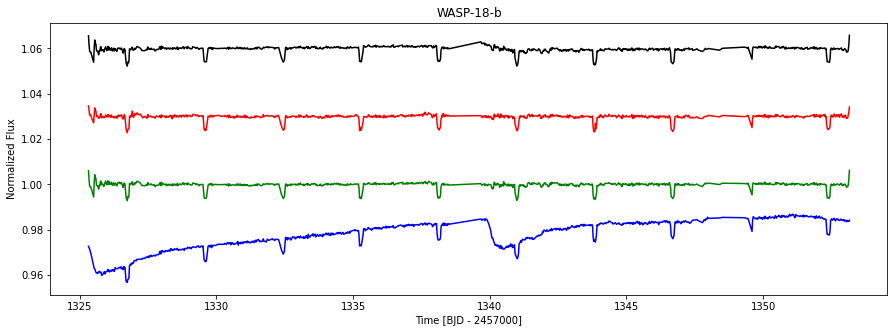

In [11]:
plt.figure(figsize=(15,5))

q = data.quality == 0

plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q])+0.06, 'k')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.03, 'r')
plt.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q]), 'g')
plt.plot(data.time[q], data.psf_flux[q]/np.nanmedian(data.psf_flux[q]) - 0.02, 'b')
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.title('WASP-18-b');

In [12]:
data.bkg_type

'2D_BKG_MODEL'

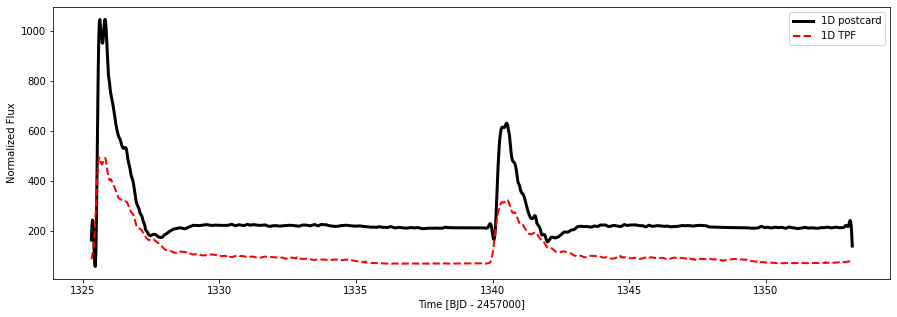

In [13]:
plt.figure(figsize=(15,5))

plt.plot(data.time, data.flux_bkg, 'k', label='1D postcard', linewidth=3)
plt.plot(data.time, data.tpf_flux_bkg, 'r--', label='1D TPF', linewidth=2)
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.legend();

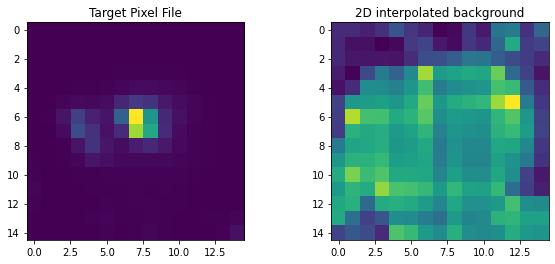

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.imshow(data.tpf[0])
ax1.set_title('Target Pixel File')
ax2.imshow(data.bkg_tpf[0])
ax2.set_title('2D interpolated background');

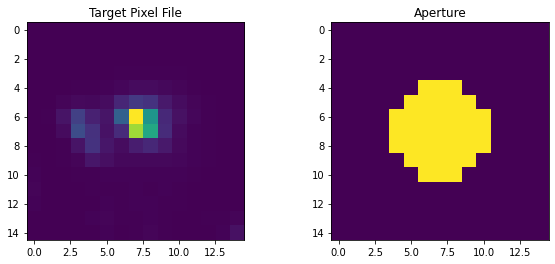

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.imshow(data.tpf[0])
ax1.set_title('Target Pixel File')
ax2.imshow(data.aperture)
ax2.set_title('Aperture');

In [13]:
data.save()

NameError: ignored

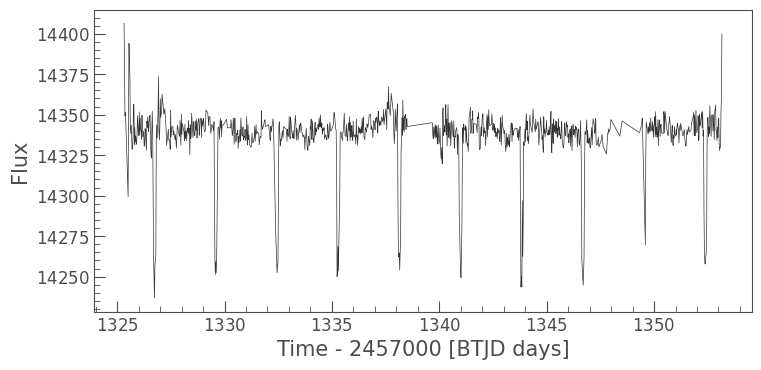

In [16]:
lk = data.to_lightkurve()
lk.plot()

In [17]:
star = eleanor.multi_sectors(tic=38846515, sectors=[1,2])

INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc.fits with expected size 158022720. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1_tess_v2_pm.txt with expected size 237847. [astroquery.query]


In [18]:
print(star)

[<eleanor.source.Source object at 0x7fd753804450>, <eleanor.source.Source object at 0x7fd78e1a2950>]


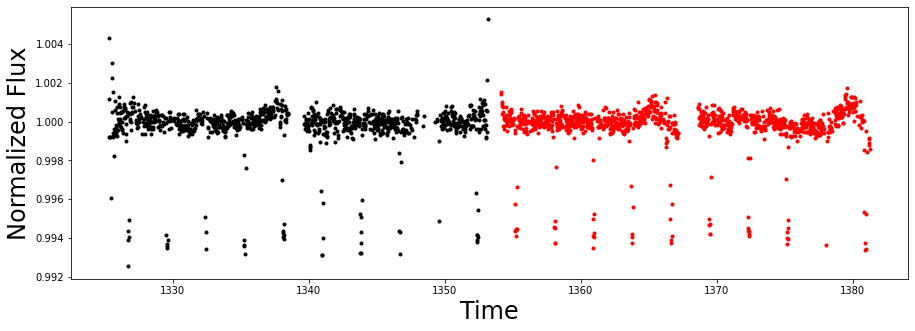

In [19]:
plt.figure(figsize=(15,5))

data = []
plot_fmt = ['k.', 'r.']

for s in star:
    datum = eleanor.TargetData(s, height=15, width=15, bkg_size=31, do_psf=False, do_pca=False)
    data.append(datum)

for sector, datum in enumerate(data):
    q = datum.quality == 0
    plt.plot(datum.time[q], datum.corr_flux[q]/np.median(datum.corr_flux[q]), plot_fmt[sector])

plt.ylabel('Normalized Flux', fontsize=24)
plt.xlabel('Time', fontsize=24)

plt.show()

In [20]:
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

In [21]:
import eleanor
import numpy as np
import matplotlib.pyplot as plt

In [22]:
star = eleanor.Source(tic=38846515, sector=1)
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True)
q = data.quality == 0

INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc.fits with expected size 158022720. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1_tess_v2_pm.txt with expected size 237847. [astroquery.query]


100%|██████████| 1282/1282 [00:25<00:00, 49.92it/s]


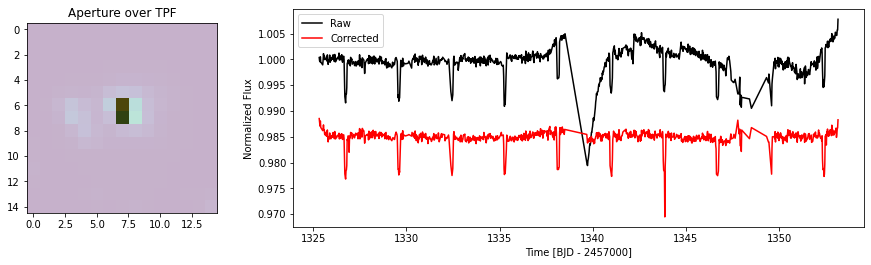

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax1.imshow(data.tpf[0])
ax1.imshow(data.all_apertures[0], cmap='Greys', alpha=0.7)
ax1.set_title('Aperture over TPF')

ax2.plot(data.time[q], data.all_raw_flux[0][q]/np.nanmedian(data.all_raw_flux[0][q]), 'k', label='Raw')
ax2.plot(data.time[q], data.all_corr_flux[0][q]/np.nanmedian(data.all_corr_flux[0][q]) - 0.015, 'r', label='Corrected')
ax2.set_xlabel('Time [BJD - 2457000]')
ax2.set_ylabel('Normalized Flux')
ax2.legend();

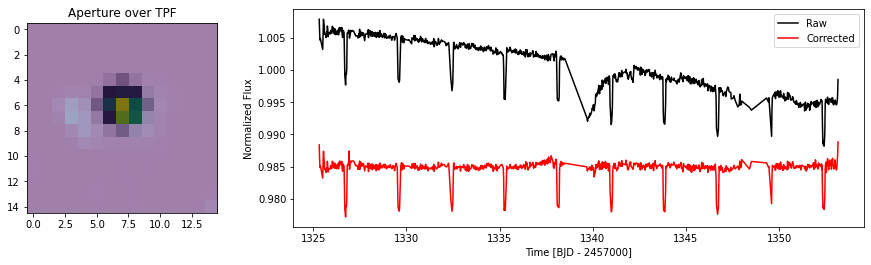

In [24]:
eleanor.TargetData.custom_aperture(data, shape='circle', r=2, pos=[7,6], method='exact')
eleanor.TargetData.get_lightcurve(data)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax1.imshow(data.tpf[0])
ax1.imshow(data.aperture, cmap='Greys', alpha=0.5)
ax1.set_title('Aperture over TPF')
#plt.imshow(data.aperture)

ax2.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]), 'k', label='Raw')
ax2.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) - 0.015, 'r', label='Corrected')
ax2.legend()
ax2.set_xlabel('Time [BJD - 2457000]')
ax2.set_ylabel('Normalized Flux');

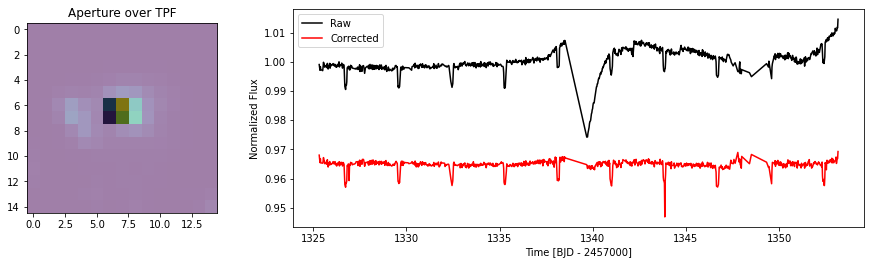

In [25]:
mask = np.zeros(np.shape(data.tpf[0]))
mask[6:8,6:8] = 1
data.get_lightcurve(aperture=mask)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax1.imshow(data.tpf[0])
ax1.imshow(mask, cmap='Greys', alpha=0.5)
ax1.set_title('Aperture over TPF')
#plt.imshow(data.aperture)

ax2.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]), 'k', label='Raw')
ax2.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) - 0.035, 'r', label='Corrected')
ax2.legend()
ax2.set_xlabel('Time [BJD - 2457000]')
ax2.set_ylabel('Normalized Flux');

In [26]:
corr_flux = eleanor.TargetData.corrected_flux(data, flux=data.raw_flux)

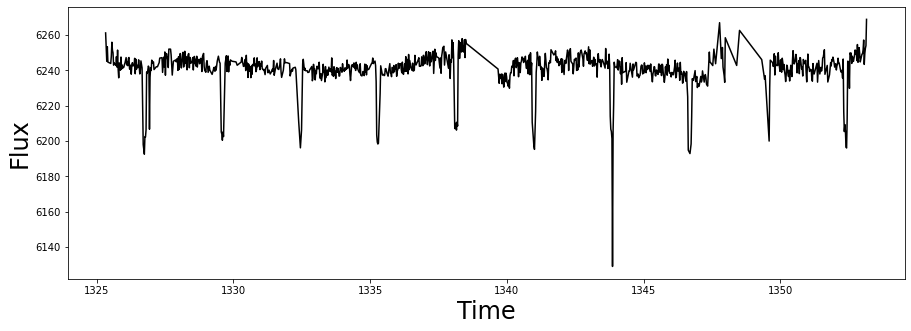

In [27]:
plt.figure(figsize=(15,5))
plt.plot(data.time[q], corr_flux[q], 'k')

plt.ylabel('Flux', fontsize=24)
plt.xlabel('Time', fontsize=24);

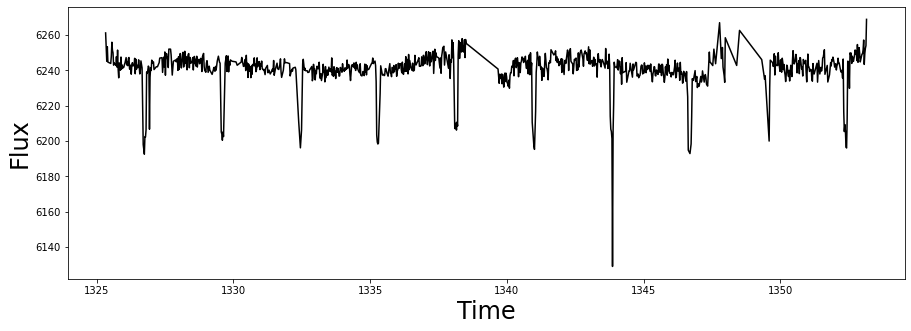

In [28]:
data.quality[q][(data.time[q] > 1333) & (data.time[q] < 1337)] = -8675309
corr_flux = eleanor.TargetData.corrected_flux(data, flux=data.raw_flux)

q = data.quality <= 0.5

plt.figure(figsize=(15,5))
plt.plot(data.time[q], corr_flux[q], 'k')

plt.ylabel('Flux', fontsize=24)
plt.xlabel('Time', fontsize=24);


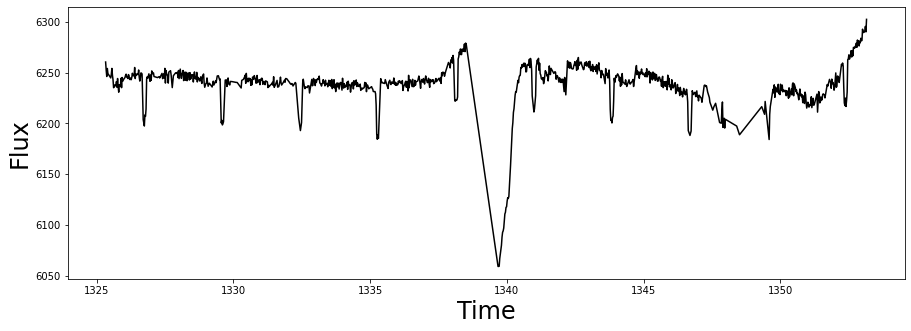

In [29]:
data.cbvs = np.zeros_like(data.cbvs)
data.centroid_xs = np.zeros_like(data.centroid_xs)
data.centroid_ys = np.zeros_like(data.centroid_ys)

corr_flux = eleanor.TargetData.corrected_flux(data, flux=data.raw_flux)

plt.figure(figsize=(15,5))
plt.plot(data.time[q], corr_flux[q], 'k')

plt.ylabel('Flux', fontsize=24)
plt.xlabel('Time', fontsize=24);

In [30]:
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True)

100%|██████████| 1282/1282 [00:26<00:00, 48.43it/s]


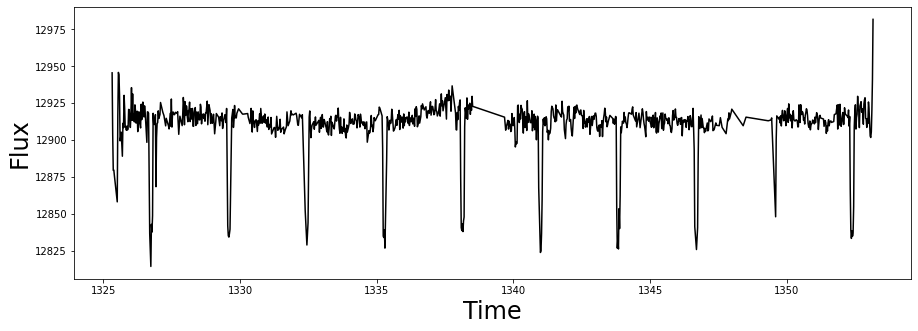

In [31]:
reg_array = np.array([data.psf_b, data.psf_c, data.psf_x]).T
corr_flux = eleanor.TargetData.corrected_flux(data, flux=data.raw_flux, regressors=reg_array)

plt.figure(figsize=(15,5))
plt.plot(data.time[q], corr_flux[q], 'k')

plt.ylabel('Flux', fontsize=24)
plt.xlabel('Time', fontsize=24);

In [32]:
eleanor.TargetData.psf_lightcurve(data, model='gaussian')

100%|██████████| 1282/1282 [00:26<00:00, 49.04it/s]


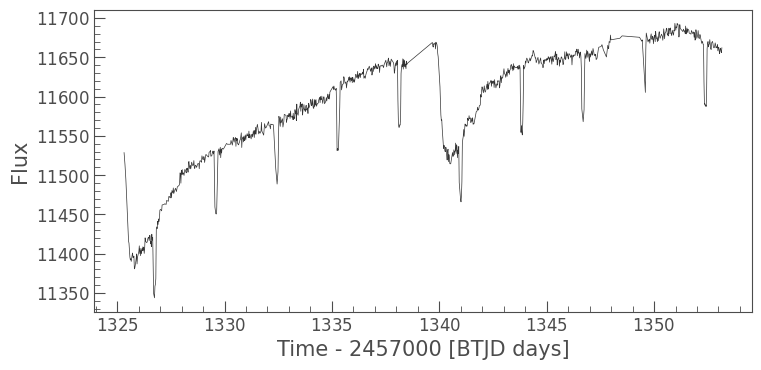

In [33]:
lk = data.to_lightkurve(flux=data.psf_flux)
lk.plot();

In [34]:
eleanor.TargetData.psf_lightcurve(data, model='gaussian', nstars=2, xc=[3.1, 7.0], yc=[6.8, 6.2])

100%|██████████| 1282/1282 [00:32<00:00, 39.44it/s]


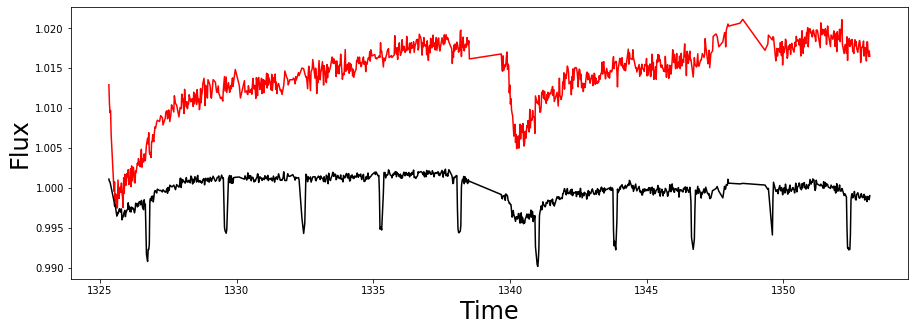

In [35]:
plt.figure(figsize=(15,5))
plt.plot(data.time[q], data.all_psf[q,0]/np.nanmedian(data.all_psf[q,0])+0.015, 'r')
plt.plot(data.time[q], data.all_psf[q,1]/np.nanmedian(data.all_psf[q,1]), 'k')


plt.ylabel('Flux', fontsize=24)
plt.xlabel('Time', fontsize=24);

In [83]:
coords = (68.959732, -64.02704)
star = eleanor.Source(coords=coords, tic=0, gaia=0, sector=1, local=True, post_dir='./testdir1', pm_dir='./testdir2')
data = eleanor.TargetData(star, do_pca=True, do_psf=False)

FileNotFoundError: ignored

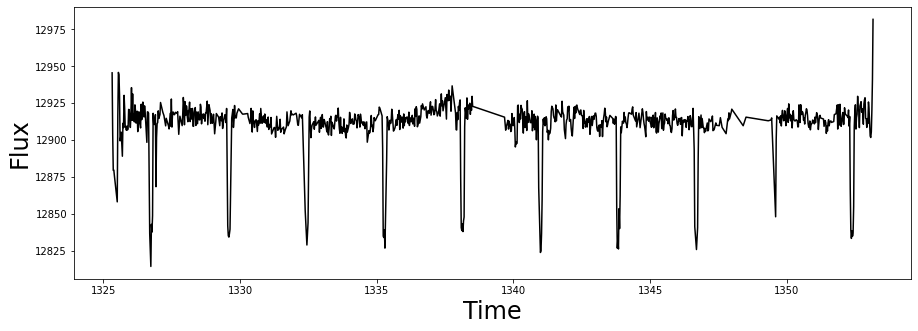

In [37]:
plt.figure(figsize=(15,5))

q = data.quality == 0
plt.plot(data.time[q], corr_flux[q], 'k')

plt.ylabel('Flux', fontsize=24)
plt.xlabel('Time', fontsize=24);

In [53]:
star.tess_mag = 10.53

In [82]:
star = eleanor.Source(name='WASP-18-b', sector=1)
data = eleanor.TargetData(star, height=31, width=13)

TypeError: ignored

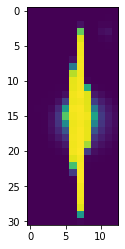

In [39]:
plt.imshow(data.tpf[300]);

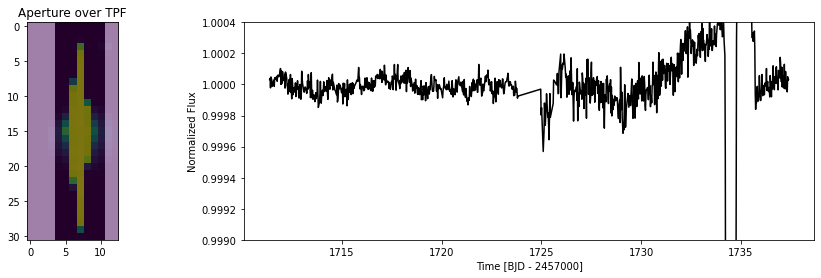

In [40]:
ap = np.zeros_like(data.tpf[300])

ap[:,4:11] = 1


data.get_lightcurve(aperture=ap)
q = data.quality == 0

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax1.imshow(data.tpf[0])
ax1.imshow(data.aperture, cmap='Greys', alpha=0.5)
ax1.set_title('Aperture over TPF')
#plt.imshow(data.aperture)

ax2.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) - 0.0, 'k')
ax2.set_ylim(0.999, 1.0004)
ax2.set_xlabel('Time [BJD - 2457000]')
ax2.set_ylabel('Normalized Flux');

In [46]:
star = eleanor.Source(name='WASP-18 b', sector=2)
data = eleanor.TargetData(star, height=21, width=13)

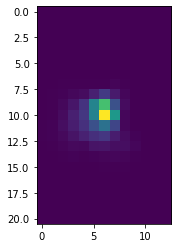

In [47]:
plt.imshow(data.tpf[300]);

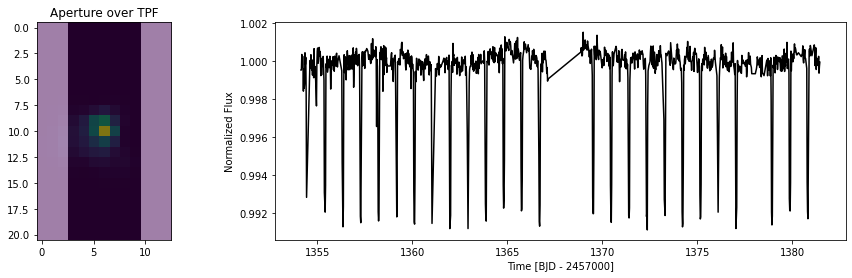

In [48]:
ap = np.zeros_like(data.tpf[300])
ap[:,3:10] = 1


data.get_lightcurve(aperture=ap)
corr_flux = eleanor.TargetData.corrected_flux(data, flux=data.raw_flux, regressors='corner')
q = data.quality == 0

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax1.imshow(data.tpf[0])
ax1.imshow(data.aperture, cmap='Greys', alpha=0.5)
ax1.set_title('Aperture over TPF')
#plt.imshow(data.aperture)

ax2.plot(data.time[q], corr_flux[q]/np.nanmedian(corr_flux[q]) - 0.0, 'k')
ax2.set_xlabel('Time [BJD - 2457000]')
ax2.set_ylabel('Normalized Flux');

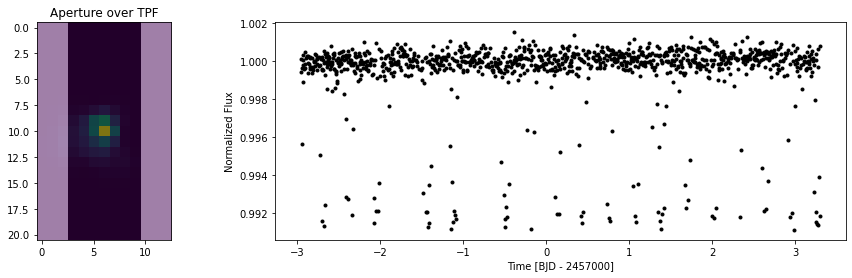

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax1.imshow(data.tpf[0])
ax1.imshow(data.aperture, cmap='Greys', alpha=0.5)
ax1.set_title('Aperture over TPF')
#plt.imshow(data.aperture)

modtime = np.mod(data.time[q], 6.268)-2.96

ax2.plot(modtime, corr_flux[q]/np.nanmedian(corr_flux[q]) - 0.0, 'k.')
ax2.set_xlabel('Time [BJD - 2457000]')
ax2.set_ylabel('Normalized Flux');